# Course 2: Introduction to TorchVision

`torchvision` is a library that provides a collection of datasets and models for computer vision. It facilitates the process of loading and preprocessing data, and provides a collection of models that can be used for common tasks in computer vision.

In this notebook, we'll learn how to use `torchvision` to load and preprocess data, and how to use pre-trained models for tasks like image classification.

Then, we will achieve the previous task of classifying images of handwritten digits from the MNIST dataset using a convolutional neural network.

We'll also take a look at the CIFAR-10 dataset, which consists of 60000 32x32 px colour images in 10 classes. We'll create a convolutional neural network that can predict the labels of these images with a reasonably high accuracy.

Let's start by installing and importing the required libraries.

## Transform and Datasets

`torchvision` provides a module called `transforms` which contains a large number of methods that can be chained together using `transforms.Compose`. Some of the popular transforms are:

- `ToTensor`: Converts a numpy array or a PIL image object into a PyTorch tensor.
- `Normalize`: Normalizes the input tensor to have a mean and standard deviation of a given value.
- `Resize`: Resizes the input PIL image to the given size.
- `RandomCrop`: Crops the input PIL image at a random location.
- `CenterCrop`: Crops the input PIL image at the center.
- `RandomHorizontalFlip`: Randomly flips the input PIL image horizontally.
- `RandomVerticalFlip`: Randomly flips the input PIL image vertically.
- etc.

`torchvision` also provides a module called `datasets` which provides a collection of datasets that can be used to train and test machine learning models. Some of the popular datasets are:

- `MNIST`: A dataset of 28x28 px grayscale images of handwritten digits.
- `CIFAR10`: A dataset of 32x32 px colour images in 10 classes.
- `ImageNet`: A massive dataset of 224x224 px colour images in 1000 classes.
- etc.

Let's start by importing `torch`, `torchvision`, `torchvision.transforms` and `torchvision.datasets`.

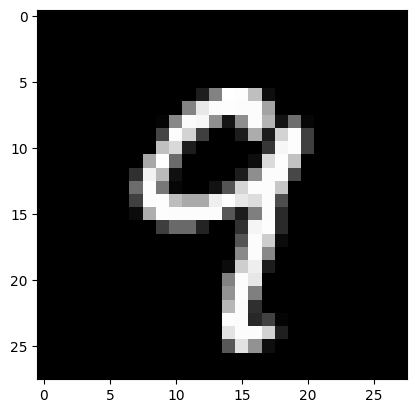

Label: 9


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the transform to convert the PIL image to a tensor and normalize it
example_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download and load the training data
example_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=example_transform)
example_loader = DataLoader(example_set, batch_size=4, shuffle=True)

# Get a single image and its label from the dataset
dataiter = iter(example_loader)
images, labels = next(dataiter)

# Function to display an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg[0], cmap='gray')
    plt.show()

# Display the first image in the batch
imshow(images[0])
print('Label:', labels[0].item())

## Pre-trained Models

`torchvision` provides a collection of pre-trained models that can be used for common tasks in computer vision. Some of the popular models are:

- `AlexNet`
- `VGG`
- `ResNet`
- `SqueezeNet`
- `DenseNet`
- `Inception`
- etc.

These models have been trained on large datasets like ImageNet and have achieved state-of-the-art performance on tasks like image classification, object detection, and image segmentation.

But it is not recommended to use these models during the competition, especially with weights that have been pre-trained on ImageNet. This is because the weights of these models have been optimized for the ImageNet dataset, and may not perform well on other datasets.

However, you can use these models as a starting point for your own models. You can load the pre-trained weights, freeze the layers, and fine-tune the model on your own dataset.

Let's start by importing `torchvision.models`, and take the `resnet18` model as an example.

In [8]:
import torchvision.models as models

# Load the pre-trained ResNet-18 model
resnet18 = models.resnet18()

# Display the model architecture
print(resnet18)

# Adjust the structure of the net to fit the MNIST dataset
resnet18.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet18.fc = torch.nn.Linear(in_features=512, out_features=10, bias=True)

# Display the model architecture with the adjusted final layer
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## MNIST Classification

Now, let's use the MNIST dataset to train a convolutional neural network that can classify images of handwritten digits. We'll use the `torchvision` module to load and preprocess the data, and the `torch.nn` module to define the model.

We'll start by defining the model architecture, then we'll load the data, train the model, and evaluate its performance.

Let's start by defining the model architecture.

### Define the Model

We'll define a convolutional neural network with 2 convolutional layers, 2 max pooling layers, and 2 fully connected layers. We'll use the ReLU activation function after each layer, and the softmax function after the final layer to get the class probabilities. It is the easiest way to define a model in PyTorch, but its accuracy is not very high.

Let's write some code to define the model architecture.

In [9]:
import torch
import torch.nn as nn

# Assuming you want to use CUDA if available
device = torch.device("mps")

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(7*7*64, 1000)
        self.fc2 = nn.Linear(1000, 10)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

We have defined a convolutional neural network with 2 convolutional layers, 2 max pooling layers, and 2 fully connected layers. We have also defined the loss function as the cross-entropy loss, and the optimizer as the stochastic gradient descent (SGD) optimizer with a learning rate of 0.001 and a momentum of 0.9. Actually, you can use `Adam`, `RMSprop`, or other optimizers in PyTorch. Now let's load the data and train the model.

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

epochs = 5

### Train the Model

Recommend: use `tqdm` to show the progress bar.

Let's write some code to train the model.

In [17]:
from tqdm import tqdm

for epoch in range(epochs):
    for (images, labels) in tqdm(trainloader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')
        

100%|██████████| 938/938 [00:06<00:00, 143.84it/s]


Epoch [1/5], Loss: 0.00042134529212489724


100%|██████████| 938/938 [00:06<00:00, 142.16it/s]


Epoch [2/5], Loss: 0.1186581701040268


100%|██████████| 938/938 [00:06<00:00, 141.46it/s]


Epoch [3/5], Loss: 0.0005305582890287042


100%|██████████| 938/938 [00:06<00:00, 142.38it/s]


Epoch [4/5], Loss: 0.026803994551301003


100%|██████████| 938/938 [00:06<00:00, 141.63it/s]

Epoch [5/5], Loss: 7.023017678875476e-05


### Evaluate the Model

Let's write some code to evaluate the model. You should clean the gradients and set the model to evaluation mode before evaluating the model.

In [18]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with (torch.no_grad()):
    correct = 0
    total = 0
    for images, labels in tqdm(testloader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total} %')

100%|██████████| 157/157 [00:01<00:00, 130.88it/s]

Accuracy of the model on the 10000 test images: 98.77 %


### Show one prediction with image

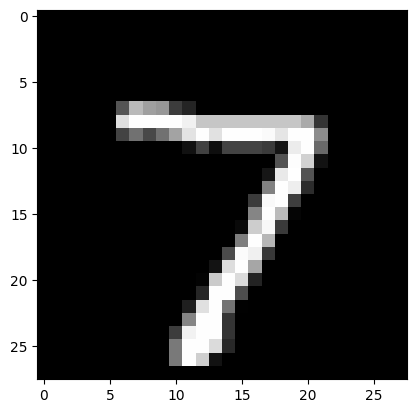

Label: 7


In [23]:
import numpy as np

# Get a random image from the test set
dataiter = iter(testloader)
images, labels = next(dataiter)

# Move the image to the device
images = images.to(device)

# Get the prediction
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# Display the image and the prediction
imshow(images[0].cpu())
print('Label:', labels[0].item())

### Save the Model

You can either save the entire model or just the model parameters. It is recommended to save the model parameters, as it is more space-efficient and allows you to load the model architecture separately.

In [25]:
# Save the state dict
torch.save(model.state_dict(), './data/state-dict.pth')

# Load the entire model
torch.save(model, './data/model.pth')